# Pre-Processing Techniques

## Imports

In [189]:
#TODO: Deal with NULL values
%reload_ext autoreload
%autoreload 2
import pandas as pd
from PreProcessingPy import pp

In [215]:
individual_display_bl = pp(['Data/Plasma/BLENNOWPLASMATAU_07Feb2024.csv'], [], ['RID', 'VISCODE'])
individual_display_bl.clean_data()

## Read the Relevant Dataframes and Merge

In [191]:
# Read the dfs
files = ['Data/Plasma/BLENNOWPLASMATAU_07Feb2024.csv', 'Data/Plasma/ADNI_BLENNOWPLASMANFL_10_03_18_27Nov2023.csv', 'Data/Plasma/UPENNPLASMA_27Nov2023.csv']
fields_needed = ['RID', 'VISCODE', 'PLASMA_NFL', 'PLASMATAU', 'AB42', 'AB40']
preprocessor = pp(files, ['RID', 'VISCODE'], fields_needed)

# Create the AB42/AB40 value
preprocessor.create_ab4240(['AB42', 'AB40'])
preprocessor.df


,RID,VISCODE,PLASMA_NFL,PLASMATAU,AB4240
0,2,bl,28.2,2.41,0.331165
1,3,bl,188.3,3.84,0.220661
2,4,bl,31.2,3.76,0.311458
3,5,bl,36.3,3.81,0.189760
4,6,bl,52.5,2.86,0.153287
...,...,...,...,...,...
519,1402,bl,94.1,4.45,0.260446
520,1409,bl,46.4,3.54,0.231390
521,1414,bl,18.7,1.45,0.130205
522,1419,bl,25.8,1.56,0.194001


In [192]:
preprocessor.add_adni_merge_data(['RID', 'VISCODE', 'DX', 'PLASMA_NFL', 'PLASMATAU', 'AB4240', 'MMSE', 'PTEDUCAT', 'AGE'])
preprocessor.df

d:\Git\NoMoreAlzheimersDisease\PreProcessingPy.py:25: DtypeWarning: Columns (20,105) have mixed types. Specify dtype option on import or set low_memory=False.
  am = pd.read_csv('Data/ADNIMERGE_15Jun2023.csv')


,RID,VISCODE,DX,PLASMA_NFL,PLASMATAU,AB4240,MMSE,PTEDUCAT,AGE
0,2,bl,CN,28.2,2.41,0.331165,28.0,16,74.3
1,3,bl,Dementia,188.3,3.84,0.220661,20.0,18,81.3
2,4,bl,MCI,31.2,3.76,0.311458,27.0,10,67.5
3,5,bl,CN,36.3,3.81,0.189760,29.0,16,73.7
4,6,bl,MCI,52.5,2.86,0.153287,25.0,13,80.4
...,...,...,...,...,...,...,...,...,...
519,1402,bl,Dementia,94.1,4.45,0.260446,23.0,20,69.3
520,1409,bl,Dementia,46.4,3.54,0.231390,21.0,15,65.9
521,1414,bl,MCI,18.7,1.45,0.130205,27.0,18,74.3
522,1419,bl,MCI,25.8,1.56,0.194001,28.0,17,77.9


## Rename Fields

In [193]:
# Rename to be more intuitive for rest of detection
preprocessor.clean_data()
preprocessor.df

,RID,VISCODE,DX,PLASMA_NFL,PLASMATAU,AB4240,MMSE,PTEDUCAT,AGE
0,2,bl,SCD,28.2,2.41,0.331165,28.0,16,74.3
1,3,bl,AD,188.3,3.84,0.220661,20.0,18,81.3
2,4,bl,MCI,31.2,3.76,0.311458,27.0,10,67.5
3,5,bl,SCD,36.3,3.81,0.189760,29.0,16,73.7
4,6,bl,MCI,52.5,2.86,0.153287,25.0,13,80.4
...,...,...,...,...,...,...,...,...,...
519,1402,bl,AD,94.1,4.45,0.260446,23.0,20,69.3
520,1409,bl,AD,46.4,3.54,0.231390,21.0,15,65.9
521,1414,bl,MCI,18.7,1.45,0.130205,27.0,18,74.3
522,1419,bl,MCI,25.8,1.56,0.194001,28.0,17,77.9


## Plot the data

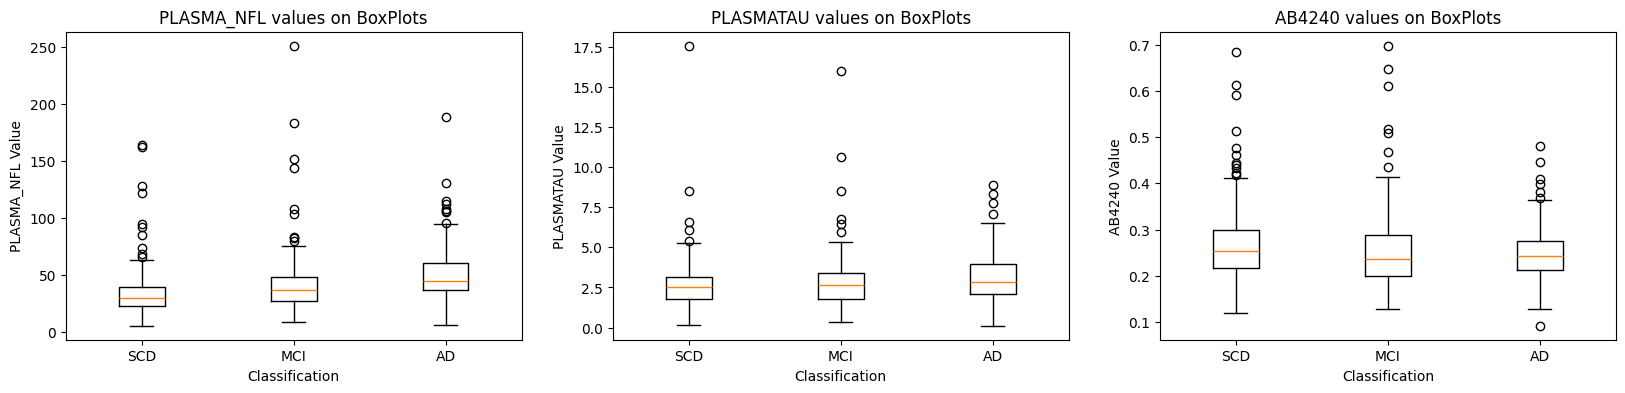

In [194]:
from PreProcessingPy import visual_display
vd = visual_display(preprocessor.df)

vd.display(['PLASMA_NFL', 'PLASMATAU', 'AB4240'])

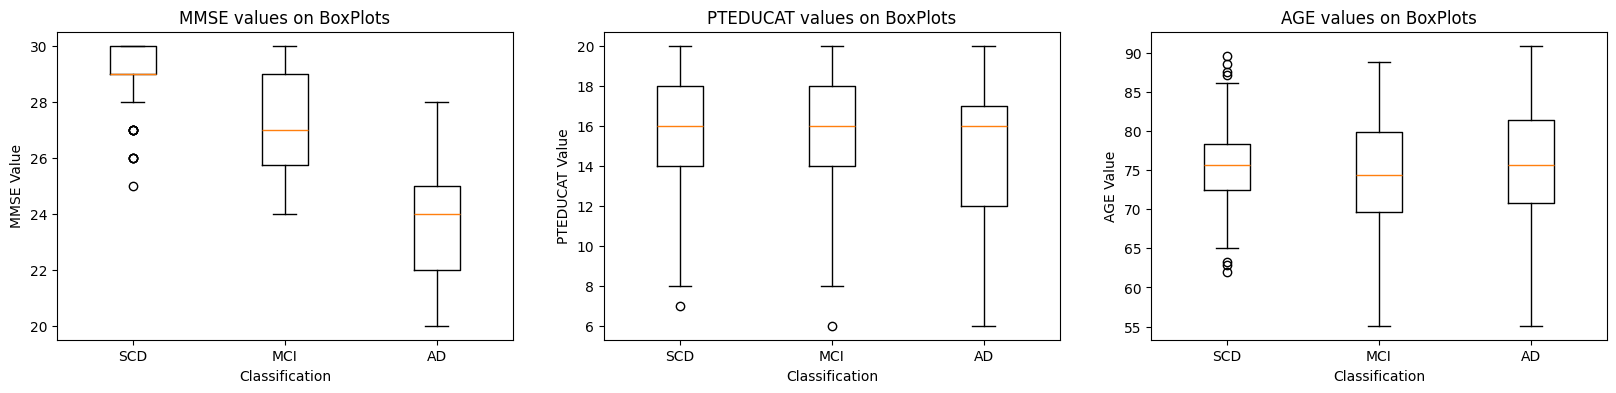

In [195]:
vd.display(['MMSE', 'PTEDUCAT', 'AGE'])

## Identify Outliers

In [196]:
# SOURCE :: https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/#:~:text=Use%20Inter%2DQuartile%20Range%20(IQR,percentile%20of%20the%20dataset%2C%20respectively.

preprocessor.remove_outliers(['PLASMA_NFL', 'PLASMATAU', 'AB4240'])

[6, 9, 398, 21, 282, 284, 286, 32, 163, 42, 180, 53, 181, 56, 184, 198, 77, 210, 94, 101, 363, 368, 242, 118, 253]


### Display the Filtered Data

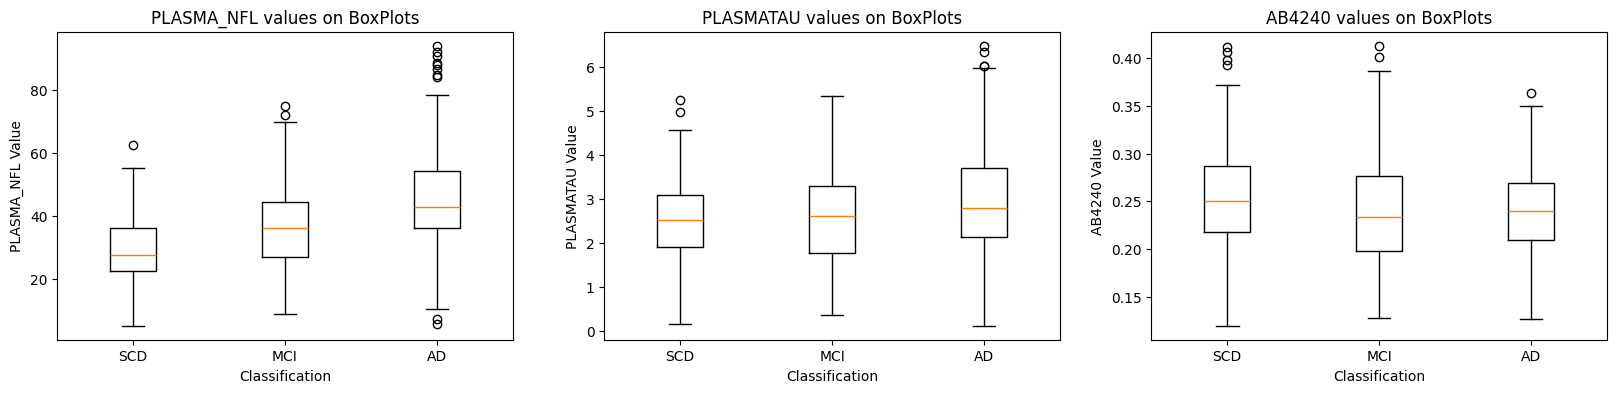

In [197]:
vd = visual_display(preprocessor.df)
vd.display(['PLASMA_NFL', 'PLASMATAU', 'AB4240'])

## A Second Attempt to Pre-Process

In [209]:
# Try to Merge UGOT and BLEN First
# blen = pd.read_csv("Data/Plasma/ADNI_BLENNOWPLASMANFLLONG_10_03_18_12Feb2024.csv")[['RID', 'VISCODE2', 'PLASMA_NFL']]
# ugot = pd.read_csv("Data/Plasma/UGOTPTAU181_06_18_20_27Nov2023.csv")[['RID', 'VISCODE2', 'PLASMAPTAU181']]
# upenn = pd.read_csv('Data/Plasma/UPENNMSMSABETA2_12Feb2024.csv').drop('VISCODE', axis=1)
files = ['Data/Plasma/ADNI_BLENNOWPLASMANFLLONG_10_03_18_12Feb2024.csv', 'Data/Plasma/UGOTPTAU181_06_18_20_27Nov2023.csv', 'Data/Plasma/UPENNMSMSABETA2_12Feb2024.csv']
fields_needed = ['RID', 'VISCODE2', 'PLASMA_NFL', 'PLASMAPTAU181', 'ABETA42', 'ABETA40']
preprocessor = pp(files, ['RID', 'VISCODE2'], fields_needed)

# Create the AB42/AB40 value
preprocessor.create_ab4240(['ABETA42', 'ABETA40'])
preprocessor.df.rename(columns={'VISCODE2':'VISCODE'}, inplace=True)
preprocessor.add_adni_merge_data(['RID', 'VISCODE', 'DX', 'PLASMA_NFL', 'PLASMAPTAU181', 'AB4240', 'MMSE', 'PTEDUCAT', 'AGE'])
# TODO:: May want to get null values later
preprocessor.clean_data()
preprocessor.df

d:\Git\NoMoreAlzheimersDisease\PreProcessingPy.py:27: DtypeWarning: Columns (20,105) have mixed types. Specify dtype option on import or set low_memory=False.
  am = pd.read_csv('Data/ADNIMERGE_15Jun2023.csv')


,RID,VISCODE,DX,PLASMA_NFL,PLASMAPTAU181,AB4240,MMSE,PTEDUCAT,AGE
0,31,m60,SCD,50.7,18.642,0.101372,30.0,18,77.7
1,31,m60,SCD,50.7,21.306,0.101372,30.0,18,77.7
2,31,m60,SCD,56.2,18.642,0.101372,30.0,18,77.7
3,31,m60,SCD,56.2,21.306,0.101372,30.0,18,77.7
4,31,m96,SCD,64.0,24.496,0.073391,30.0,18,77.7
...,...,...,...,...,...,...,...,...,...
1176,5289,bl,SCD,21.5,8.672,0.195596,29.0,16,59.7
1177,5290,bl,SCD,42.4,18.583,0.076744,29.0,12,67.0
1178,5292,bl,SCD,42.6,17.408,0.102321,30.0,13,74.3
1179,5295,bl,SCD,16.4,10.932,0.144890,29.0,15,75.5


## Visualise the Data

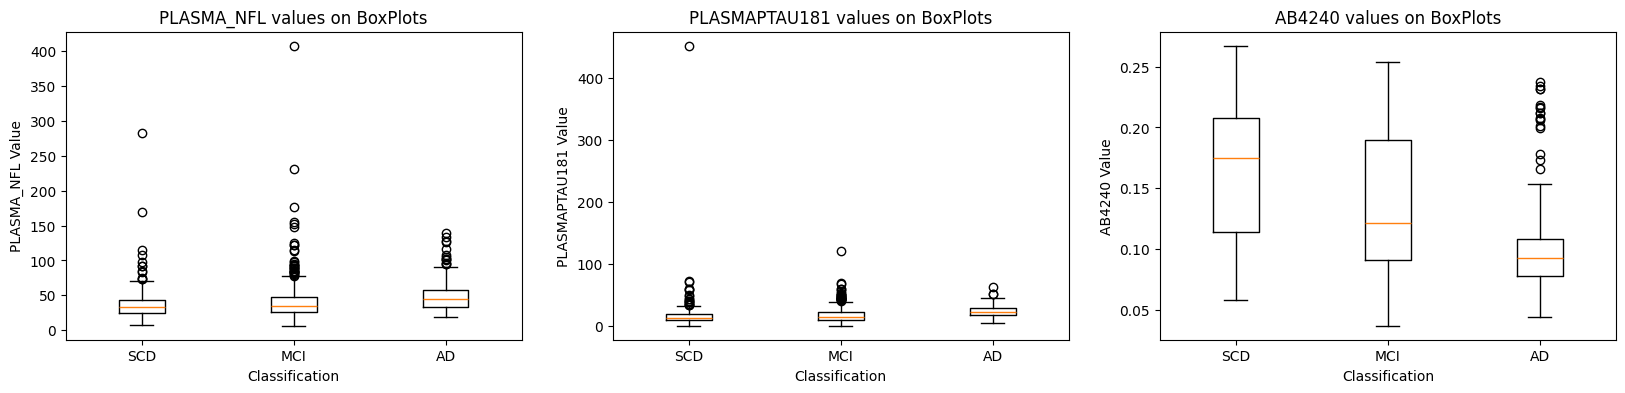

In [210]:
vd = visual_display(preprocessor.df)

vd.display(['PLASMA_NFL', 'PLASMAPTAU181', 'AB4240'])

## Remove the Outliers

In [211]:
preprocessor.remove_outliers(['PLASMA_NFL', 'PLASMAPTAU181', 'AB4240'])

[397, 669, 417, 674, 418, 562, 818, 819, 438, 695, 696, 697, 698, 60, 61, 329, 73, 589, 350, 612, 100, 102, 999, 622, 1135, 1149]


## Visualise the Cleaned Data

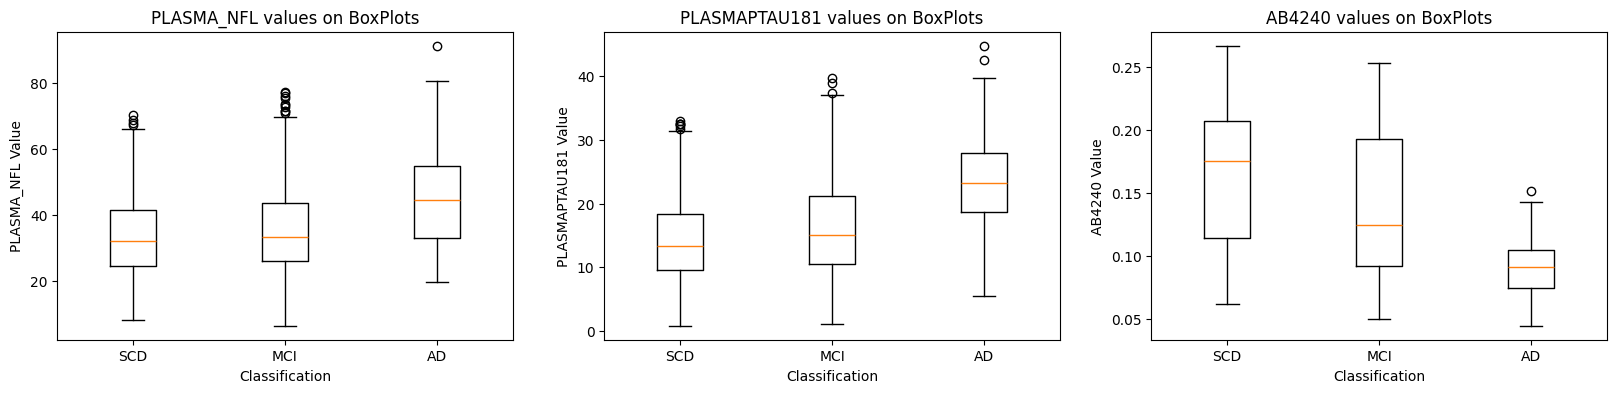

In [212]:
vd = visual_display(preprocessor.df)

vd.display(['PLASMA_NFL', 'PLASMAPTAU181', 'AB4240'])

In [ ]:
df.to_csv("Data/ProcessedData/FilteredData2.csv", index=False)